In [50]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression

# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [51]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


# Feature Engineering 

In [52]:
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [53]:
# select the columns
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
y_column = ['log_price']

In [54]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
df_train = df_train.fillna(0.0) # probably not a good idea for 'review_scores_rating'
print(df_train.shape)

(51000, 6)
(51000, 6)


# Model Training

In [55]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 5)
y_train (40800, 1)
X_test (10200, 5)
y_test (10200, 1)


In [56]:
# train a linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

RMSE 0.58


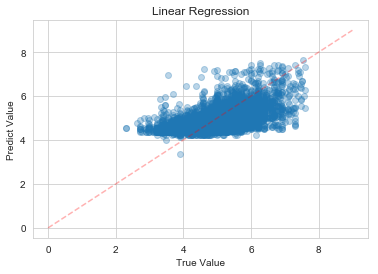

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

# Prepare submission

In [59]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.529394
1,16436737,4.860783
2,18209634,4.362675
3,15027024,4.695045
4,18074243,5.234042
5,8446914,4.534364
6,19362916,4.773933
7,16116059,5.224193
8,20912583,4.695045
9,13573101,4.889337


In [61]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)